# Задание №1

Кладиева Алина, 18ИАД.

Датасет (https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) содержит разного рода информацию о сотрудниках некоторой компании.

Описание некоторых признаков:<br>
<b>Education</b>:                1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor' <br>
<b>EnvironmentSatisfaction</b>:  1 'Low' 2 'Medium' 3 'High' 4 'Very High' <br>
<b>JobInvolvement</b>:           1 'Low' 2 'Medium' 3 'High' 4 'Very High' <br>
<b>JobSatisfaction</b>:          1 'Low' 2 'Medium' 3 'High' 4 'Very High' <br>
<b>PerformanceRating</b>:        1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding' <br>
<b>RelationshipSatisfaction</b>: 1 'Low' 2 'Medium' 3 'High' 4 'Very High' <br>
<b>WorkLifeBalance</b>:          1 'Bad' 2 'Good' 3 'Better' 4 'Best' <br>

<b>Attrition</b> - изнурён ли сотрудник своей работой (Yes/No) <br>
<b>OverTime</b> - Работает ли сотрудник во внерабочее время <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Чтение данных

In [2]:
raw_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=",")
raw_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
print(raw_data.shape)
print(raw_data.columns)

(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [4]:
# Удалим несколько колонок с избыточной информацией для упрощения
data = raw_data.drop(["EmployeeCount", "EmployeeNumber", "StandardHours"], axis=1)

In [5]:
print(data.shape)
print(data.columns)

(1470, 32)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [7]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2,Male,...,3,1,0,6,3,4,4,3,1,2


In [8]:
# Уникальные значения в колонке средствами Pandas
data["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [9]:
# Уикальные значения в колонке и их число средствам Numpy
np.unique(data["EducationField"], return_counts=True)

(array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array([ 27, 606, 159, 464,  82, 132], dtype=int64))

In [10]:
data.at[1469, "Age"]

34

In [11]:
data["Department"][1469]

'Research & Development'

In [12]:
data[["Department", "Age", "TotalWorkingYears"]].head()

,Department,Age,TotalWorkingYears
0,Sales,41,8
1,Research & Development,49,10
2,Research & Development,37,7
3,Research & Development,33,8
4,Research & Development,27,6


In [13]:
# Можно видеть, например, что средний возраст сотрудников - около 37 лет (mean Age); 
# а максимальный срок работы в компании - 40 лет (max YearsAtCompany) 
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
data.describe(include = ['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


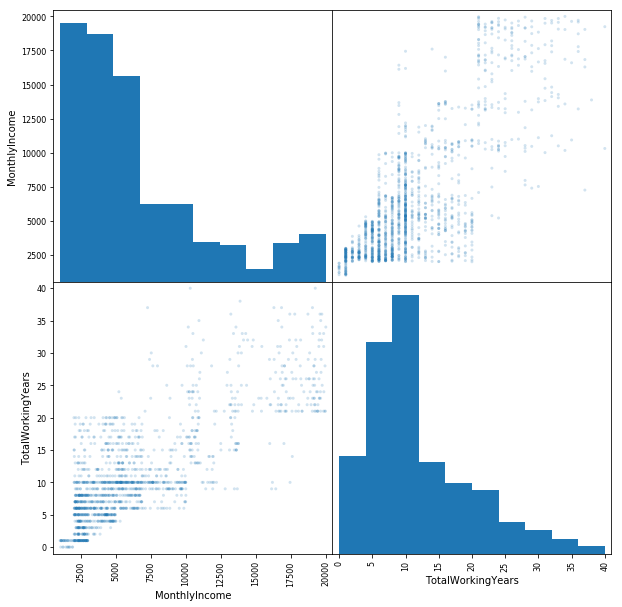

In [15]:
# Не рисую scatter matrix для всех признаков, т.к. она получается слишком огромная

# По графикам на главной диагонали видно, что доход большинства сотрудников - 2500-5000 у.е. в месяц; 
# и большая часть сотрудников работает в компании 5-10 лет

# По графикам вне главной диагонали видно, что ежемесячный доход, как правило, растёт вместе с общим числом 
# отработанных сотрудником лет
from pandas.plotting import scatter_matrix
scatter_matrix(data[["MonthlyIncome", "TotalWorkingYears"]], alpha = .2, figsize = (10, 10))
pass

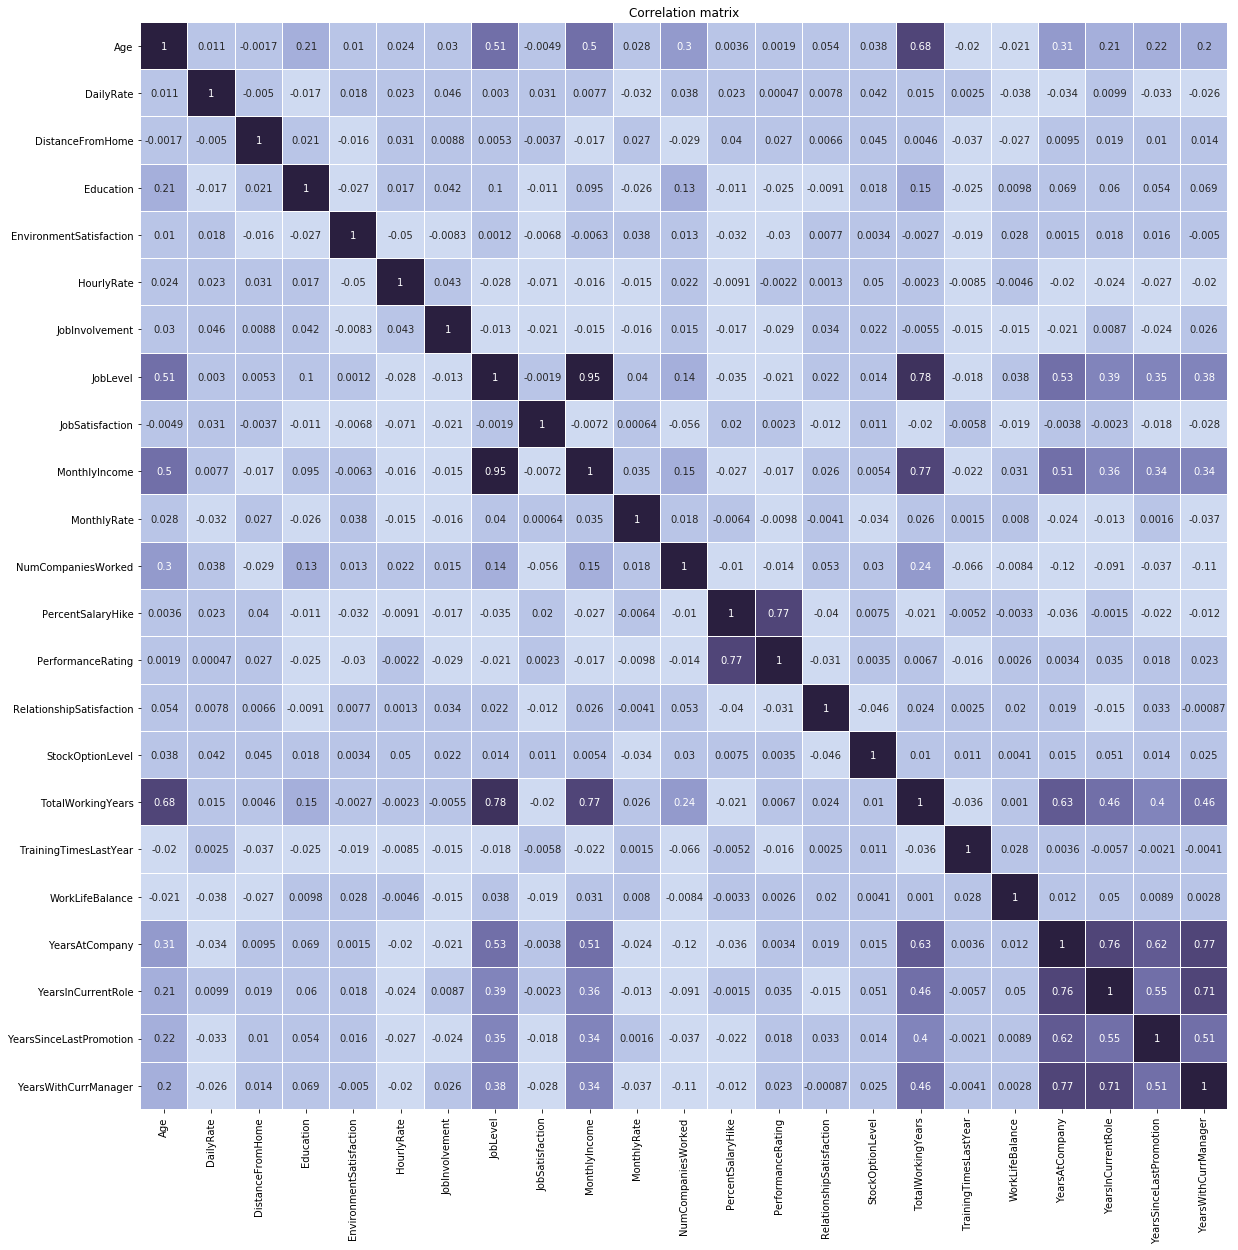

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = data.corr()

f, ax = plt.subplots(figsize=(20, 20))
plt.title('Correlation matrix')
sns.heatmap(correlations, linewidths=0.01, square=True, cbar=False,
            cmap=sns.cubehelix_palette(10, start=.2, rot=-.15), annot=True)

In [17]:
# Найдем несколько наиболее коррелирующих между собой признаков. 
# Исключим единицы на главной диагонали (корреляции признаков самих с собой) и возьмем значения по модулю 
# (чтобы при сортировке учесть как положительные, так и отрицательные корреляции):
correlations = correlations.replace(1, 0).abs()
print(correlations.unstack().sort_values(kind="quicksort", ascending=False).head())

MonthlyIncome      JobLevel             0.950300
JobLevel           MonthlyIncome        0.950300
                   TotalWorkingYears    0.782208
TotalWorkingYears  JobLevel             0.782208
PerformanceRating  PercentSalaryHike    0.773550
dtype: float64


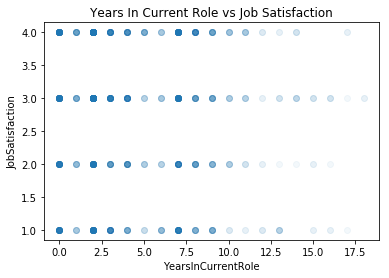

In [18]:
# Странно, но не похоже, что число лет проработанных на одной и той же должности влияет на удовлетворённость работой...
# Видно только, что мало кто в принципе долго работает на одной и той же должности 
plt.plot(data['YearsInCurrentRole'], data['JobSatisfaction'], 'o', alpha = 0.05)
plt.xlabel('YearsInCurrentRole')
plt.ylabel('JobSatisfaction')
plt.title('Years In Current Role vs Job Satisfaction')
pass

In [19]:
# И правда, эти признаки почти не коррелируют
correlations["YearsInCurrentRole"]["JobSatisfaction"]

0.0023047852298301056

In [20]:
# Посчитаем, сколько сотрудников имеют и не имеют медицинское образование
(data["EducationField"] == "Medical").value_counts()

False    1006
True      464
Name: EducationField, dtype: int64

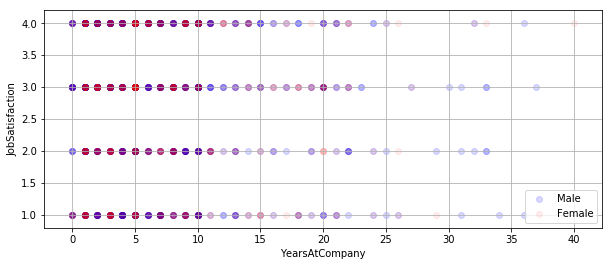

In [21]:
# Видно, что по большей части дольше всего в компании работают мужчины
# А степень удовлетворённости работой примерна одинаково распределена как для мужчин, так и для женщин
plt.figure(figsize = (10, 4))

np.random.seed(0)
job_sat_rnd = data['JobSatisfaction'] + np.random.randint(data.shape[0])

plt.scatter(data[data['Gender'] == "Male"]['YearsAtCompany'],
            data[data['Gender'] == "Male"]['JobSatisfaction'],
            alpha = 0.15,
            label = 'Male',
            color = 'b')

plt.scatter(data[data['Gender'] == "Female"]['YearsAtCompany'],
            data[data['Gender'] == "Female"]['JobSatisfaction'],
            alpha = 0.07,
            label = 'Female',
            color = 'r')

plt.xlabel('YearsAtCompany')
plt.ylabel('JobSatisfaction')
plt.legend()
plt.grid()

## Подготовка данных

In [22]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [23]:
for c in categorical_columns:
    print(c, data[c].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


In [24]:
# В таблице нет пропущенных значений
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [25]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Attrition', 'Gender', 'OverTime'] ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


### Обработаем бинарные признаки

In [26]:
data.at[data['Gender'] == 'Male', 'Gender'] = 0
data.at[data['Gender'] == 'Female', 'Gender'] = 1
data["Gender"] = data["Gender"].astype('int64')

In [27]:
data.at[data['Attrition'] == 'No', 'Attrition'] = 0
data.at[data['Attrition'] == 'Yes', 'Attrition'] = 1
data["Attrition"] = data["Attrition"].astype('int64')

In [28]:
data.at[data['OverTime'] == 'No', 'OverTime'] = 0
data.at[data['OverTime'] == 'Yes', 'OverTime'] = 1
data["OverTime"] = data["OverTime"].astype('int64')

### Обработаем категориальные признаки

In [29]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')


In [30]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [31]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,...,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-1.257498e-17,7.401487e-18,9.081926e-18,3.392978e-17,3.422810e-16,1.236350e-16,1.225022e-16,-2.218558e-18,-1.102293e-16,-4.304946e-17,...,-9.838691e-16,-9.667248e-17,1.496913e-16,2.462127e-17,-1.147608e-16,-6.011820e-17,-1.034698e-17,9.478435e-17,-2.839754e-17,-1.080768e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.071487e+00,-1.735985e+00,-1.010565e+00,-1.867790e+00,-1.575150e+00,-1.765478e+00,-2.431178e+00,-9.611593e-01,-1.567373e+00,-1.166946e+00,...,-4.260850e-01,-1.583639e+00,-9.316973e-01,-1.449673e+00,-2.171243e+00,-2.492972e+00,-1.143905e+00,-1.167290e+00,-6.789146e-01,-1.155541e+00
25%,-7.579120e-01,-8.363770e-01,-8.872132e-01,-8.913849e-01,-6.603060e-01,-8.800620e-01,-1.025818e+00,-9.611593e-01,-6.606284e-01,-7.629491e-01,...,-4.260850e-01,-6.587487e-01,-9.316973e-01,-6.785426e-01,-6.199782e-01,-1.077495e+00,-6.542311e-01,-6.152822e-01,-6.789146e-01,-5.950247e-01
50%,-1.011244e-01,-1.203726e-03,-2.704519e-01,8.502032e-02,2.545383e-01,5.353989e-03,3.795430e-01,-5.776789e-02,2.461164e-01,-3.364371e-01,...,-4.260850e-01,2.661420e-01,2.419060e-01,-1.644554e-01,1.556541e-01,3.379811e-01,-3.277818e-01,-3.392783e-01,-3.685899e-01,-3.147664e-01
75%,6.651278e-01,8.785782e-01,5.930139e-01,1.061426e+00,1.169383e+00,8.784725e-01,3.795430e-01,8.456235e-01,1.152861e+00,3.984889e-01,...,-4.260850e-01,1.191033e+00,2.419060e-01,4.781535e-01,1.556541e-01,3.379811e-01,3.251169e-01,7.647374e-01,2.520597e-01,8.062671e-01
max,2.526026e+00,1.726143e+00,2.443298e+00,2.037831e+00,1.169383e+00,1.677806e+00,1.784904e+00,2.652406e+00,1.152861e+00,2.866651e+00,...,2.345353e+00,1.191033e+00,2.589113e+00,3.691198e+00,2.482551e+00,1.753458e+00,5.385081e+00,3.800780e+00,3.975957e+00,3.608851e+00


In [32]:
# Соединим все вместе
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(1470, 50)


### Решим задачу предсказания "выгорания" сотрудника на работе по его личным данным

In [33]:
X = data.drop(('Attrition'), axis = 1) 
y = data['Attrition']
feature_names = X.columns

In [34]:
# Разделим выборку на обучающую и тестовую (30% тестовая, 70%  обучающая)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Метод K ближайших соседей

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Для начала возьмем число соседей наугад, пусть это будет 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

# Сохраним значение ошибки на тестовой выборке для метода 5ти ближайших соседей
err_test_before_parameter_selection = err_test

0.13022351797862003 0.1292517006802721


In [37]:
# Матрица ошибок
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[376   4]
 [ 53   8]]


In [38]:
# Проведем подбор параметра K для метода kNN 
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.16520894071914483 15


In [39]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# Сохраним значение ошибки на тестовой выборке для метода 10ти ближайших соседей (подобранный параметр)
err_test_after_parameter_selection = err_test

0.16229348882410108 0.1383219954648526


In [40]:
# Посчитаем, насколько уменьшилась ошибка после подбора наилучшего параметра
err_diff = err_test_after_parameter_selection - err_test_before_parameter_selection
err_diff

0.00907029478458049

In [41]:
# Попробуем воспользоваться методом кросс-валидации (разобьем данные на 10 блоков для поочередного использования одного из них в качестве тестовой выборки)
from sklearn import model_selection
knn_scores = model_selection.cross_val_score(knn, X, y, cv = 10)
knn_errors = 1 - knn_scores # Поскольку раньше мы оперировали ошибками, для удобства посчитаем ошибку и тут
print(knn_errors)
knn_errors.mean()

[0.16216216 0.15540541 0.16891892 0.15646259 0.15646259 0.16326531
 0.15646259 0.15068493 0.15068493 0.15753425]


0.15780436573000173

Кросс-валидация для метода kNN дала большую ошибку, чем была при единичном разбиении (т.е. удачность разбиения действительно влияет на результат, и в теории, не использование кросс-валидации может ввести в заблуждение относительно качества модели). Ошибка для каждого варианта разбиения в данном случае варьируется в пределах +-1% (не очень сильно, что показывает, что датасет составлен хорошо) 

### SVC

In [42]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.1185617103984451 0.12698412698412698


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.13411078717201164 1000.0


### Random Forest

In [44]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.13151927437641722


### Extremely Randomized Trees

In [45]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 1000).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.12244897959183673


### AdaBoost

In [46]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.004859086491739553 0.16326530612244897


### GBT

In [47]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.14285714285714285


Наилучшие результаты (наим.ошибку) на тестовой выборке показал алгоритм Extremely Randomized Trees. Возможно, результаты были бы несколько другими, если бы во всех перечисленных методах использовалась кросс-валидация.

### Значимость признаков

In [48]:
N, d = X.shape
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'MonthlyIncome' (0.076799)
 2. feature '  Age' (0.062312)
 3. feature 'OverTime' (0.054893)
 4. feature 'TotalWorkingYears' (0.050622)
 5. feature 'DailyRate' (0.049271)
 6. feature 'MonthlyRate' (0.045982)
 7. feature 'HourlyRate' (0.043664)
 8. feature 'YearsAtCompany' (0.042568)
 9. feature 'DistanceFromHome' (0.042244)
10. feature 'NumCompaniesWorked' (0.036864)
11. feature 'YearsInCurrentRole' (0.032301)
12. feature 'StockOptionLevel' (0.032232)
13. feature 'YearsWithCurrManager' (0.031556)
14. feature 'PercentSalaryHike' (0.031542)
15. feature 'TrainingTimesLastYear' (0.024867)
16. feature 'JobSatisfaction' (0.024617)
17. feature 'EnvironmentSatisfaction' (0.024513)
18. feature 'YearsSinceLastPromotion' (0.024117)
19. feature 'RelationshipSatisfaction' (0.021960)
20. feature 'MaritalStatus_Single' (0.021908)
21. feature 'JobInvolvement' (0.020489)
22. feature 'JobLevel' (0.019305)
23. feature 'Education' (0.018974)
24. feature 'WorkLifeBalance' (0.018

(-1, 20)

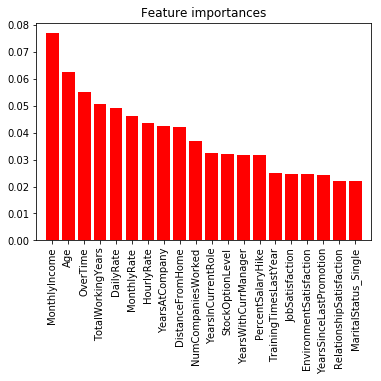

In [49]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Задание 2

##  Обучение неглубокой полносвязной нейронной сети

### Обучим классификатор с одним скрытым слоем и параметром альфа = 0.0001 и 14ю нейронами в каждом слое (случайный выбор параметров)

In [50]:
from sklearn.neural_network import MLPClassifier
random_alpha = 0.0001
random_hidden_layer_size = 29
mlp_model = MLPClassifier(hidden_layer_sizes=(random_hidden_layer_size,), alpha=random_alpha, solver='lbfgs', random_state=12)
mlp_model.fit(X_train, y_train) # Объем обучающей выборки - 70%

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(29,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=12, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Найдем ошибки на обучающей и тестовой выборках

In [51]:
err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test  = np.mean(y_test  != mlp_model.predict(X_test))
print(err_train, err_test)

0.0 0.1927437641723356


Видно, что ошибка на тестовой выборке довольно сильно превосходит ошибку на обучающей выборке (равную нулю). Следовательно, при данных значениях параметра классификатор переобучился. 

### Попробуем подобрать оптимальные значения параметров классификатора вручную

In [52]:
import numpy as np
alpha_values = np.logspace(start=-5, stop=2, num=10, base=10) # alpha - 10 значений от 10^-4 до 10^2

In [53]:
errors_train = []
errors_test = []

# Зафиксируем hidden_layer_size на выбранном нами случайном значении. 
# Потенциально это не очень хорошо для подбора оптимального alpha (если выбранное случайно число нейронов - неудачное) 
for alpha in alpha_values:
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(random_hidden_layer_size,), solver='lbfgs', random_state=12)
    mlp_model.fit(X_train, y_train)

    errors_train.append(np.mean(y_train != mlp_model.predict(X_train)))
    errors_test.append(np.mean(y_test != mlp_model.predict(X_test)))

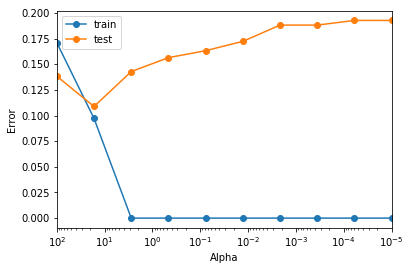

In [54]:
plt.semilogx(alpha_values, errors_train, label = 'train', marker='o')
plt.semilogx(alpha_values, errors_test, label = 'test', marker='o')
plt.xlim([np.max(alpha_values), np.min(alpha_values)])

plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Error')
pass

In [55]:
min_error_train = np.min(errors_train)
min_error_test = np.min(errors_test)
print(min_error_train, min_error_test)

0.0 0.10884353741496598


Как можно видеть, подбор оптимального параметра alpha почти вдвое снизил разницу между минимальными ошибками на обучающей и тестовой выборках. 

Оптимальные значения alpha (при фиксированном на случайном значении числе нейронов):

In [56]:
best_alphas = alpha_values[errors_test == min_error_test]
print(best_alphas)
best_alpha = best_alphas[0]

[16.68100537]


Теперь попробуем подобрать оптимальное число нейронов в скрытом слое:

In [57]:
hidden_layer_sizes = [(i,) for i in np.arange(2,22,4)] # от 2х до 20 с шагом 2

In [58]:
errors_train = []
errors_test = []

for layer_size in hidden_layer_sizes:
    mlp_model = MLPClassifier(alpha=best_alpha, hidden_layer_sizes=layer_size, solver='lbfgs', random_state=12)
    mlp_model.fit(X_train, y_train)

    errors_train.append(np.mean(y_train != mlp_model.predict(X_train)))
    errors_test.append(np.mean(y_test != mlp_model.predict(X_test)))

In [59]:
hidden_layer_sizes = np.array([size[0] for size in hidden_layer_sizes]) # tuple to ndarray

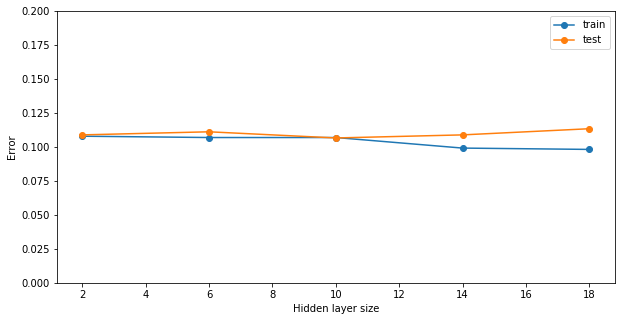

In [60]:
plt.figure(figsize=(10,5))
plt.plot(hidden_layer_sizes, errors_train, label = 'train', marker='o')
plt.plot(hidden_layer_sizes, errors_test, label = 'test', marker='o')

plt.ylim([0, 0.2])
plt.legend()
plt.xlabel('Hidden layer size')
plt.ylabel('Error')
pass

Минимальные ошибки:

In [61]:
min_error_train = np.min(errors_train)
min_error_test = np.min(errors_test)

print(min_error_train, min_error_test)

0.09815354713313897 0.10657596371882086


Оптимальное число нейронов в скрытом слое:

In [62]:
best_hidden_layer_sizes = hidden_layer_sizes[errors_test == min_error_test]
print(best_hidden_layer_sizes)

[10]


Найденные таким образом оптимальные значения параметров могут на самом деле быть не самыми оптимальными, т.к. мы подбирали их по очереди, фиксируя при подборе первого параметра второй параметр на случайном (необязательно оптимальном значении). Чтобы найти действительно лучшие параметры, надо перебирать все их комбинации. Кроме того, для повышения надёжности результатов, стоит воспользоваться кросс-валидацией.

### Попробуем найти комбинацию оптимальных параметров перебором и с использованием кросс-валидации:

In [63]:
clf = GridSearchCV(MLPClassifier(), param_grid={'solver':['lbfgs'], 'hidden_layer_sizes': hidden_layer_sizes, 'alpha': alpha_values}, cv=5)

In [64]:
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'solver': ['lbfgs'], 'hidden_layer_sizes': array([ 2,  6, 10, 14, 18]), 'alpha': array([1.00000e-05, 5.99484e-05, 3.59381e-04, 2.15443e-03, 1.29155e-02,
       7.74264e-02, 4.64159e-01, 2.78256e+00, 1.66810e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
min_error = 1 - clf.best_score_
print(min_error, min_error_test)

0.11360544217687074 0.10657596371882086


Оптимальные параметры:

In [66]:
clf.best_params_

{'alpha': 16.68100537200059, 'hidden_layer_sizes': 10, 'solver': 'lbfgs'}

### Попробуем разное число скрытых слоёв при оптимальных значениях параметров:

Два скрытых слоя:

In [67]:
best_hidden_layer_size = clf.best_params_['hidden_layer_sizes']
best_alpha = clf.best_params_['alpha']

mlp_model = MLPClassifier(alpha = best_alpha, hidden_layer_sizes = (best_hidden_layer_size, best_hidden_layer_size,),
                          solver = 'lbfgs', random_state = 12)
mlp_model.fit(X_train, y_train)

err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test = np.mean(y_test != mlp_model.predict(X_test))
print(err_train, err_test)

0.07580174927113703 0.12018140589569161


Один скрытый слой:

In [68]:
mlp_model = MLPClassifier(alpha = best_alpha, hidden_layer_sizes = (best_hidden_layer_size,),
                          solver = 'lbfgs', random_state = 12)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)
print(err_train, err_test)

0.10689990281827016 0.10657596371882086


Итак, наименьшую ошибку показала нейронная сеть с одним скрытым слоем.

## Метрики качества

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       380
           1       0.79      0.31      0.45        61

   micro avg       0.89      0.89      0.89       441
   macro avg       0.85      0.65      0.69       441
weighted avg       0.88      0.89      0.87       441



In [70]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_pred, y_test)
tn, fp, fn, tp = conf_matrix.ravel()
print("TN: {}, FP: {}, FN: {}, TP: {}".format(tn, fp, fn, tp))

# Та же матрица, но в более читабельном виде:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

TN: 375, FP: 42, FN: 5, TP: 19


Predicted,0,1,All
True,,,
0,375,5,380
1,42,19,61
All,417,24,441


Получили сравнительно высокую ошибку 1го рода, т.е. много ложных срабатываний. Кроме того, можно видеть, что для 1го класса значения метрик recall & f1-score очень низкие. Это можно объяснить в том числе и несбалансированностью выборки (объектов выборки, принадлежащих в действительности классу 0 намного больше, чем объектов класса 1). В дальнейшем можно попробовать с этим бороться (например, методом Undersampling - выкидыванием части объектов превалирующего класса; или oversampling - дублированием объектов меньшего класса). Плюс при кросс-валидации надо разбивать выборку так, чтобы в каждом блоке сохранялось исходное соотношение классов. 

Итак, обучение неглубокой полносвязной нейронной сети позволило слегка снизить ошибку с 12,5% (минимальная ошибка, полученная на рассмотренных ранее методах (GBT & Extremely Randomized Trees)) до 11%. Вероятно, данное значение можно улучшить, например, путем поиска еще более лучших параметров (перебором большего их числа); или повышением сбалансированности выборки.

In [71]:
count_class_0, count_class_1 = y.value_counts()

In [72]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender,OverTime
0,0.446199,0.742274,-1.010565,-0.891385,-0.660306,1.382668,0.379543,-0.057768,1.152861,-0.108313,...,0,0,0,1,0,0,0,1,1,1
1,1.321915,-1.297333,-0.147100,-1.867790,0.254538,-0.240595,-1.025818,-0.057768,-0.660628,-0.291619,...,0,0,1,0,0,0,1,0,0,0
2,0.008340,1.413882,-0.887213,-0.891385,1.169383,1.284288,-1.025818,-0.961159,0.246116,-0.937335,...,0,0,0,0,0,0,0,1,0,1
3,-0.429518,1.460969,-0.763861,1.061426,1.169383,-0.486544,0.379543,-0.961159,0.246116,-0.763374,...,0,0,1,0,0,0,1,0,1,1
4,-1.086306,-0.524116,-0.887213,-1.867790,-1.575150,-1.273580,0.379543,-0.961159,-0.660628,-0.644639,...,0,0,0,0,0,0,1,0,0,0


In [73]:
import numpy
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_data = X
Y_data = y
X_ros, y_ros = ros.fit_sample(X_data, Y_data)

print(X_ros.shape[0] - X_data.shape[0], 'new random picked points')

unique, counts = numpy.unique(y_ros, return_counts=True)
dict(zip(unique, counts))

996 new random picked points


{0: 1233, 1: 1233}

In [74]:
clf = GridSearchCV(MLPClassifier(), param_grid={'solver':['lbfgs'], 'hidden_layer_sizes': hidden_layer_sizes, 'alpha': alpha_values}, cv=5)

In [75]:
clf.fit(X_data, Y_data)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'solver': ['lbfgs'], 'hidden_layer_sizes': array([ 2,  6, 10, 14, 18]), 'alpha': array([1.00000e-05, 5.99484e-05, 3.59381e-04, 2.15443e-03, 1.29155e-02,
       7.74264e-02, 4.64159e-01, 2.78256e+00, 1.66810e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
min_error = 1 - clf.best_score_
print(min_error, min_error_test)

0.108843537414966 0.10657596371882086


In [77]:
clf.best_params_

{'alpha': 16.68100537200059, 'hidden_layer_sizes': 14, 'solver': 'lbfgs'}

In [78]:
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, Y_data, test_size = 0.3, random_state = 12)

In [79]:
import numpy
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_data = X
Y_data = y
X_ros, y_ros = ros.fit_sample(X_data_train, y_data_train)

print(X_ros.shape[0] - X_data.shape[0], 'new random picked points')

256 new random picked points


In [80]:
best_hidden_layer_size = clf.best_params_['hidden_layer_sizes']
best_alpha = clf.best_params_['alpha']


mlp_model = MLPClassifier(alpha = best_alpha, hidden_layer_sizes = (best_hidden_layer_size, best_hidden_layer_size, ),
                          solver = 'lbfgs', random_state = 12)
mlp_model.fit(X_data_train, y_data_train)

y_data_train_pred = mlp_model.predict(X_data_train)
y_data_test_pred = mlp_model.predict(X_data_test)

err_train = np.mean(y_data_train != y_data_train_pred)
err_test = np.mean(y_data_test != y_data_test_pred)
print(err_train, err_test)

0.05150631681243926 0.1292517006802721


In [81]:
pd.crosstab(y_data_test, y_data_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,353,17,370
1,40,31,71
All,393,48,441


# Задание 3
## Ансамбли решающих деревьев

In [82]:
def run_classifier(classifier, n_estimators):
    errors_train = []
    errors_test = []
   
    for e in n_estimators:
        model = classifier(n_estimators = e)
        model.fit(X_train, y_train)

        errors_train.append(np.mean(y_train != model.predict(X_train)))
        errors_test.append(np.mean(y_test != model.predict(X_test)))
    return errors_train, errors_test

In [83]:
def plot_classifier_results(errors_train, errors_test, n_estimators):
    plt.figure(figsize=(30,5))
    
    plt.plot(n_estimators, errors_train, label = 'train', marker='o')
    plt.plot(n_estimators, errors_test, label = 'test', marker='o')

    plt.legend()
    plt.xlabel('Number of estimators')
    plt.ylabel('Error')    

In [84]:
n_estimators = range(5, 205, 5)

In [85]:
rf_errors_train, rf_errors_test = run_classifier(ensemble.RandomForestClassifier, n_estimators)

In [86]:
et_errors_train, et_errors_test = run_classifier(ensemble.ExtraTreesClassifier, n_estimators)

In [87]:
ab_errors_train, ab_errors_test = run_classifier(ensemble.AdaBoostClassifier, n_estimators)

In [88]:
gb_errors_train, gb_errors_test = run_classifier(ensemble.GradientBoostingClassifier, n_estimators)

Выведем результаты классификации для ансамблей деревьев каждого типа отдельно:

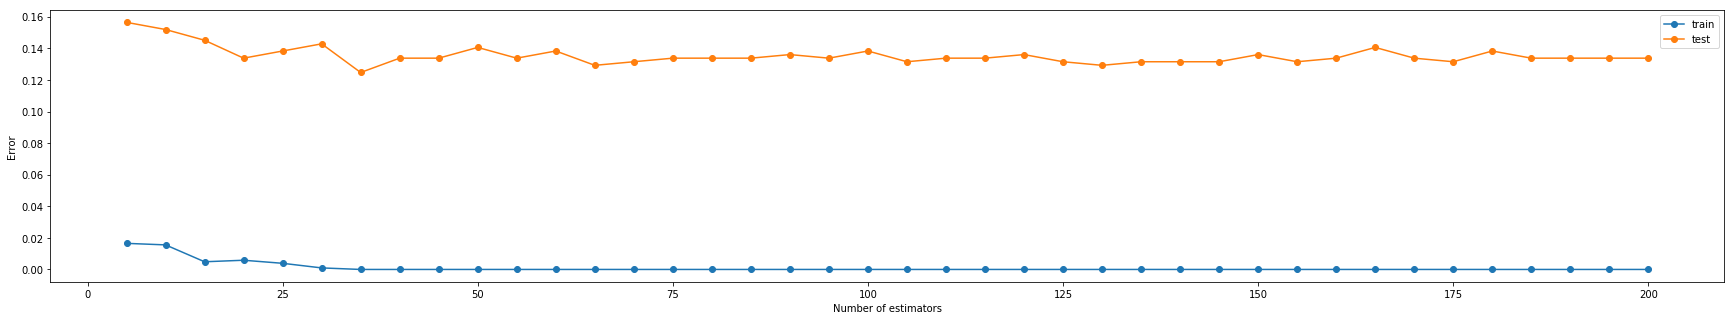

In [89]:
plot_classifier_results(rf_errors_train, rf_errors_test, n_estimators)

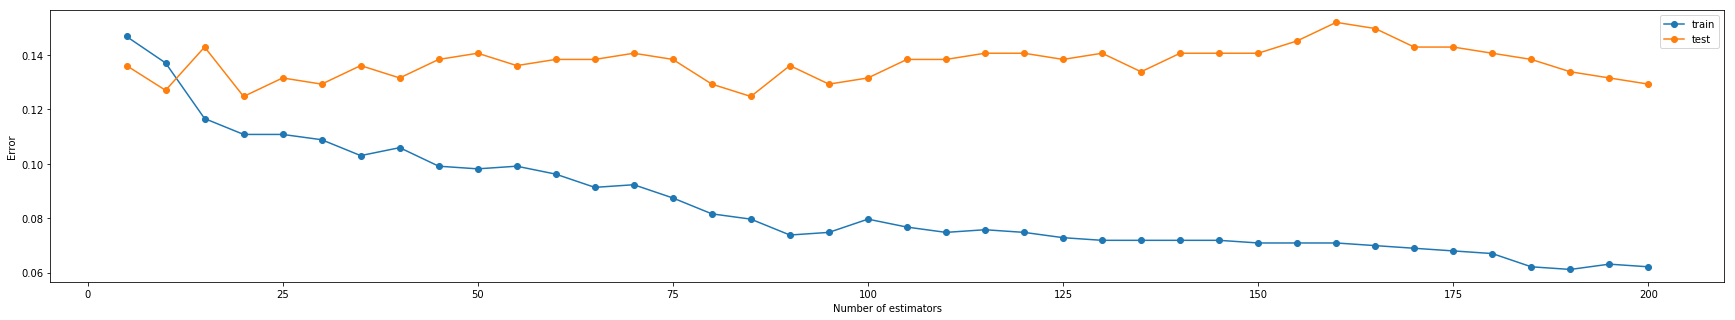

In [90]:
plot_classifier_results(ab_errors_train, ab_errors_test, n_estimators)

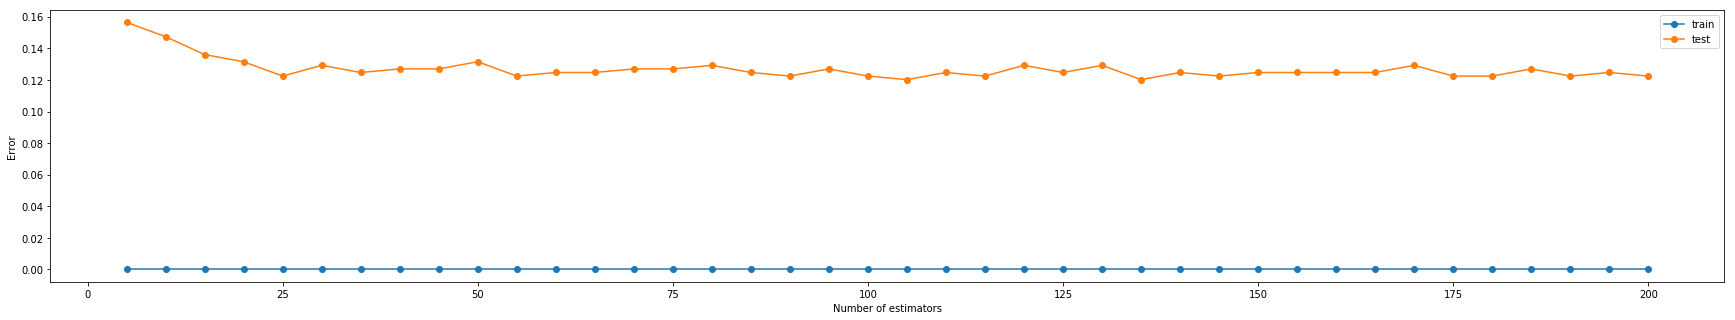

In [91]:
plot_classifier_results(et_errors_train, et_errors_test, n_estimators)

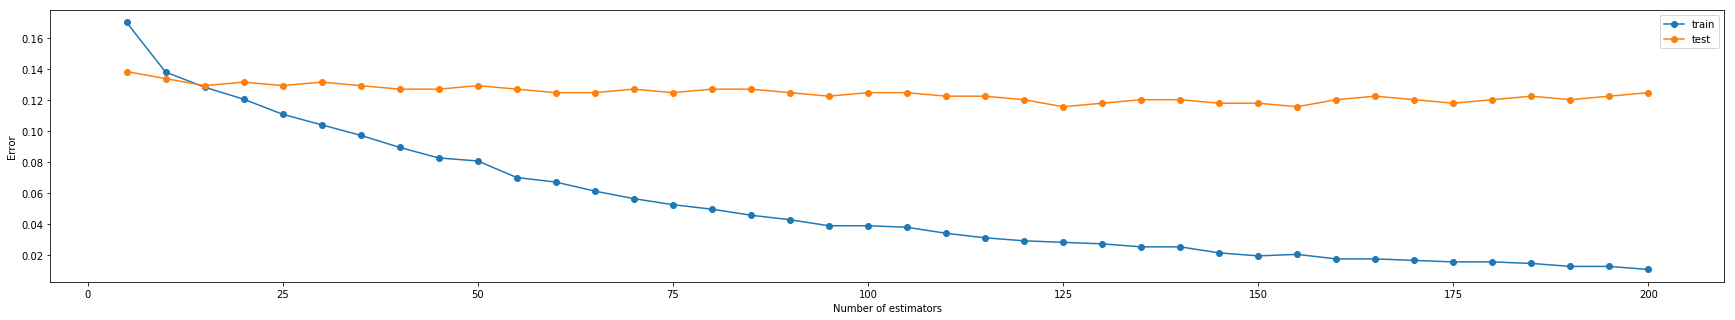

In [92]:
plot_classifier_results(gb_errors_train, gb_errors_test, n_estimators)

А теперь все вместе на одном графике, отдельно для тренировочной и для тестовых выборок:

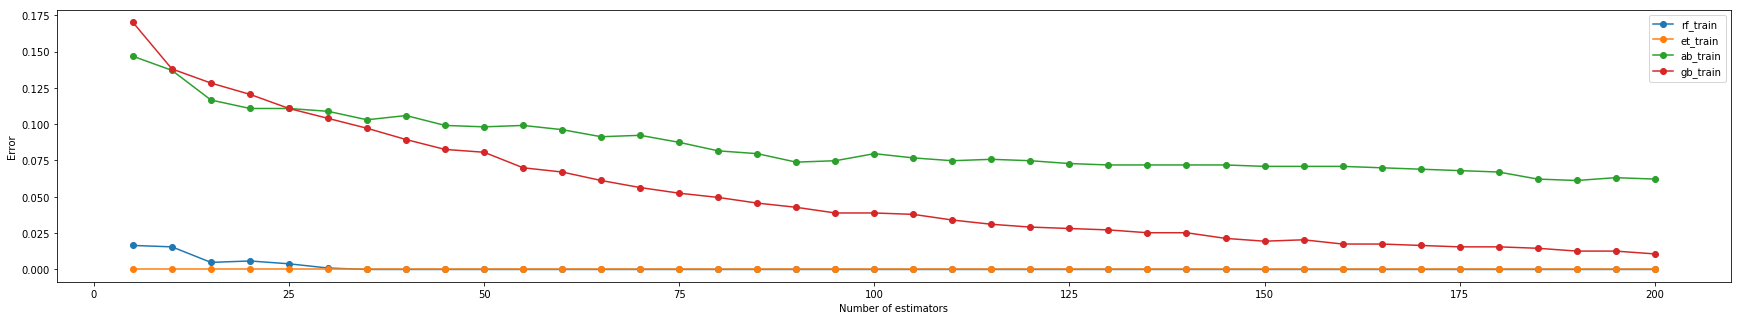

In [93]:
plt.figure(figsize=(30,5))

plt.plot(n_estimators, rf_errors_train, label = 'rf_train', marker='o')
plt.plot(n_estimators, et_errors_train, label = 'et_train', marker='o')
plt.plot(n_estimators, ab_errors_train, label = 'ab_train', marker='o')
plt.plot(n_estimators, gb_errors_train, label = 'gb_train', marker='o')

plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Error')
pass

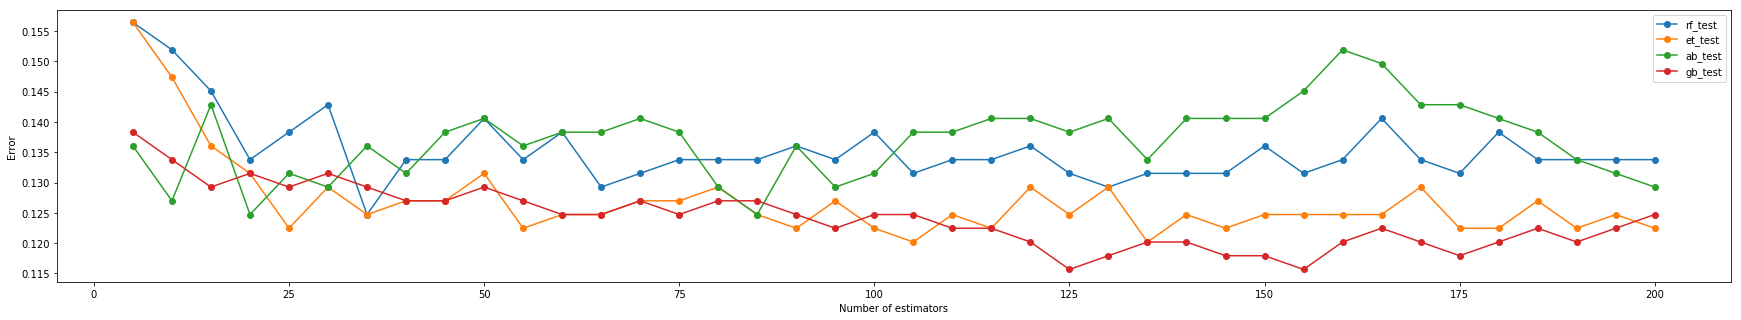

In [94]:
plt.figure(figsize=(30,5))

plt.plot(n_estimators, rf_errors_test, label = 'rf_test', marker='o')
plt.plot(n_estimators, et_errors_test, label = 'et_test', marker='o')
plt.plot(n_estimators, ab_errors_test, label = 'ab_test', marker='o')
plt.plot(n_estimators, gb_errors_test, label = 'gb_test', marker='o')

plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Error')
pass

Видно, что ансамбль Extremely Randomized Trees сильно переобучается, стабильно выдавая нулевую ошибку на тренировочной выборке, и достаточно высокую (в среднем 13-14%) - на тестовой. Похоже себя ведет и Random Forest, но, на тестовой выборке его резуьтаты значительно хуже, чем у ERT.  

Результаты Adaboost (зеленая линия на графике [272]) на тестовой выборке оказались наиболее зависимыми от количества деревьев - ошибка заметно "скачет", достигая пика между 150 и 175 деревьями, а затем снова резко убывает.

У Adaboost и GBT наблюдается недообучение (одинаково высокая ошибка как на тренировочной, так и на тестовой выборке) при небольшом (до 25) количестве деревьев.

Наиболее высокие темпы сходимости на тренировочной выборке показал ансамбль Gradient Boosted Trees (быстро опускающаяся красная линия на графике [271]). На тестовой выборке он также показал наименьшую среди других методов ошибку:

In [95]:
minimum_test_errors = {"rf": min(rf_errors_test), "et": min(et_errors_test), 
                       "ab": min(ab_errors_test), "gb": min(gb_errors_test)}

min_error = min(minimum_test_errors.values())
best_ensemble = min(minimum_test_errors, key=minimum_test_errors.get)

print(best_ensemble, min_error)

gb 0.11564625850340136


Число деревьев, при котором ансамбль Gradient Boosted Trees показал лучший результат:

In [96]:
best_n_estimators = n_estimators[gb_errors_test.index(min_error)]
best_n_estimators

125

Посмотрим, возможно ли улучшить результат, используя кросс-валидацию. Для алгоритмов Random Forest, Extremely Randomized Trees и Gradient Boosted Trees попробуем ограничить максимальную глубину дерева подбором параметра max_depth.

In [97]:
max_depths = range(10, 510, 50)

In [98]:
def grid_search(grid, reference_error):
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    min_error = 1 - grid.best_score_
    print(min_error, reference_error)

### Random Forest

In [99]:
grid = GridSearchCV(ensemble.RandomForestClassifier(), cv=5,
                    param_grid = {'n_estimators': n_estimators, 'max_depth': max_depths})
grid_search(grid, min(rf_errors_test))

{'max_depth': 460, 'n_estimators': 15}
0.13896987366375124 0.12471655328798185


### Extremely Randomized Trees

In [100]:
grid = GridSearchCV(ensemble.ExtraTreesClassifier(), cv=5, 
                    param_grid = {'n_estimators': n_estimators, 'max_depth': max_depths})
grid_search(grid, min(et_errors_test))

{'max_depth': 60, 'n_estimators': 70}
0.13994169096209907 0.12018140589569161


### Gradient Boosted Trees

In [101]:
grid = GridSearchCV(ensemble.GradientBoostingClassifier(), cv=5, 
                    param_grid = {'n_estimators': n_estimators, 'max_depth': max_depths})
grid_search(grid, min(gb_errors_test))

{'max_depth': 10, 'n_estimators': 90}
0.17103984450923226 0.11564625850340136


Как можно видеть, ограничение максимальной глубины дерева не дало улучшения ошибки ни для одного из алгоритмов.

Итак, выведем минимальные достигнутые ошибки для каждого из алгоритмов:

In [102]:
minimum_test_errors

{'rf': 0.12471655328798185,
 'et': 0.12018140589569161,
 'ab': 0.12471655328798185,
 'gb': 0.11564625850340136}

Видно, что Random Forest, ERT и Adaboost достигли примерно одинакового результата, в то время как GBT, как в целом по графикам зависимости от числа деревьев, так и по минимальной ошибке, оказался лучшим. 

# Метод главных компонент

Проверим, как повлияет на ошибку сокращение размерности пространства признаков путем применения метода PCA. В качестве классификатора на новых данных возьмем показавший ранее наилучший результат алгоритм GBT.

In [ ]:
from sklearn.decomposition import PCA

In [121]:
max_possible_n_components = data.shape[1]
components = range(1, max_possible_n_components)
err_test = []
err_train = []
for c in components:
    pca = PCA(n_components=c, random_state=22)
    X_train_red = pca.fit_transform(X_train)
    X_test_red = pca.transform(X_test)
    
    model = ensemble.GradientBoostingClassifier(n_estimators=90, max_depth=10)
    model.fit(X_train_red, y_train)
    
    err_train.append(np.mean(y_train != model.predict(X_train_red)))
    err_test.append(np.mean(y_test != model.predict(X_test_red)))
    

In [122]:
min(err_train)

0.0

Минимальная ошибка на тестовой выборке:

In [123]:
min(err_test)

0.12698412698412698

Оптимальное число компонент:

In [128]:
err_test.index(min(err_test)) + 1

28

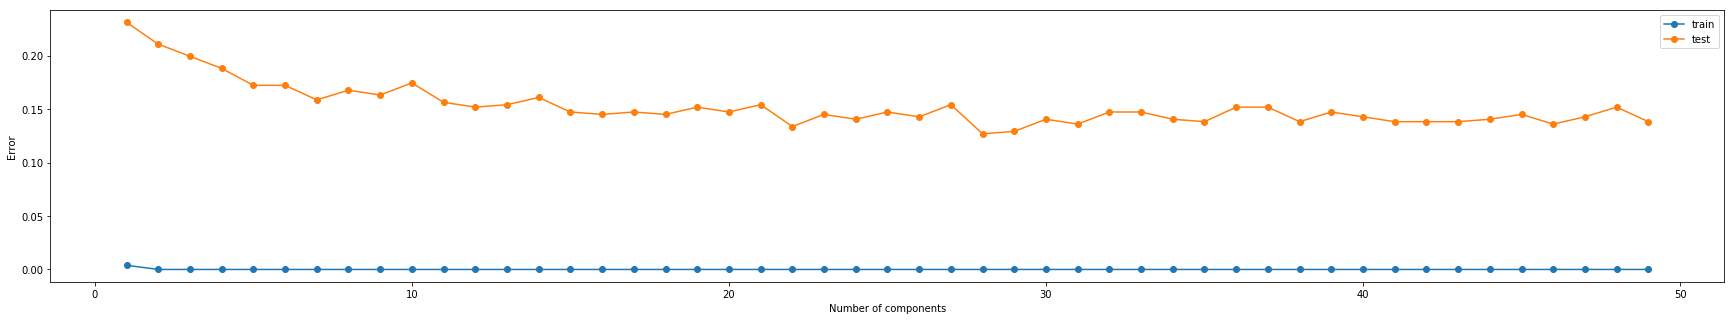

In [125]:
plt.figure(figsize=(30,5))
    
plt.plot(components, err_train, label = 'train', marker='o')
plt.plot(components, err_test, label = 'test', marker='o')

plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Error')
pass

Видно, что уменьшение числа компонент не снижает ошибку. Более того, при малом (до 10) числе компонент наблюдается более сильное переобучение. Возможно, это объясняется довольно небольшим количеством коррелирующих переменных (см. матрицу корреляции [16]).